# Building Graph with NetworkX

# Importing Libraries

In [1]:
import itertools
import copy
import networkx as nx
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Description

I have downloaded dataset DM-LC which is fly data set for small/medium-scale protein-protein interactions. The dataset was originally in text file, it was quite hard for me how to what was going in data set. As a data science learner, this problem was data exploration - I didn't know what I am looking for. I was think how I could make this dataset as structured. I have spent quite well amount of time on dataset whether it should be text or csv. Like everything has it own pros and cons, So I have decided to go with the csv file. Text files are mostly suitable for unstructured data but in my data set there were two things nodes and their weights. Below shared link explained most common used data formats.
https://www.analyticsvidhya.com/blog/2017/03/read-commonly-used-formats-using-python/

# Changing Data set Schema to Structured 

In [2]:
#reading text file 
with open('DM-LC.txt', 'r') as text_file:
    #spliting text file by lines
    split_by_line = (line.strip() for line in text_file)
    lines = (line.split() for line in split_by_line if line)
    with open('DM-LC.csv', 'w') as csv_file:
        #writing to csv file
        writer = csv.writer(csv_file)
        #making new csv file
        #inserting column names
        writer.writerow(('node1','node2','distance'))
        writer.writerows(lines)

# Load Dataset

It is simple data set that I would use to create the graphs. Each row represents a single edge of the graph with weight attribute.
node1 and node2: names of the connected nodes
distance: distance between two nodes or length of the edge

In [3]:
edgelist = pd.read_csv('DM-LC.csv')
edgelist.head(10)

,node1,node2,distance
0,B0024.14,F38E9.2,3.4297
1,B0025.2,F11C1.6,3.4297
2,B0025.2,F55D12.4,3.4297
3,B0025.2,F57B9.10,3.4297
4,B0035.10,B0207.4,3.4297
5,B0035.10,C09G4.5,3.4297
6,B0035.10,K01G5.2,3.4297
7,B0035.10,K07C11.2,3.4297
8,B0035.10,K08H2.6,3.4297
9,B0035.10,R06A4.7,3.4297


# Create Graph

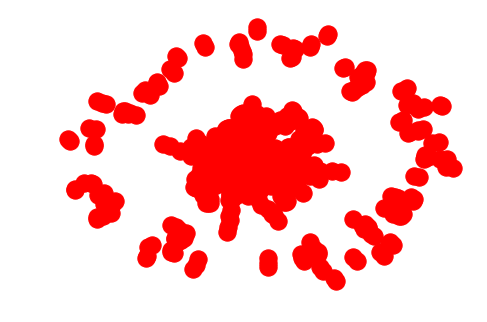

In [30]:
#Creating empty graph without edges and nodes
%matplotlib inline
import networkx as nx
g = nx.Graph()

for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())       
    
nx.draw(g)

# Number of Nodes, Edges and the Average Degree of the network

In [67]:
print('# of edges: {}'.format(g.number_of_edges()))
print('# of nodes: {}'.format(g.number_of_nodes()))

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)


avg_degree = sum(degree_sequence)/ g.number_of_nodes()
print('degree of network: {}' .format(avg_degree))

# of edges: 1129
# of nodes: 658
degree of network: 3


# Density of the Network

In [111]:
den = nx.density(g)
print('density of network: {}' .format(den))

density of network: 0.0052231521191


# Minimum Spanning Tree 

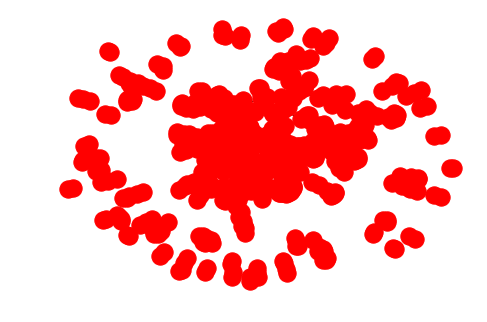

In [70]:
MST = nx.minimum_spanning_tree(g)
nx.draw(MST)

# Degree Distribution Histogram

In [65]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

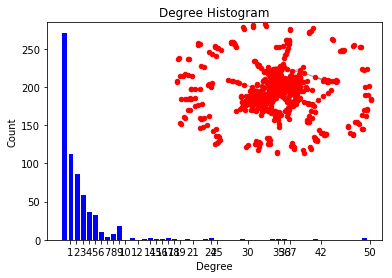

In [97]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.9 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)[0]
pos = nx.spring_layout(g)
plt.axis('off')
nx.draw_networkx_nodes(g, pos, node_size=20)
nx.draw_networkx_edges(g, pos, alpha=0.4)

plt.show()


# Largest Component of the Network

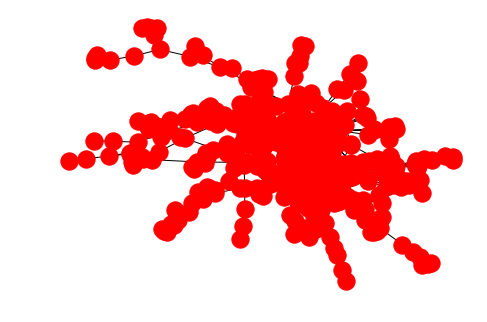

In [105]:
cg = max(nx.connected_component_subgraphs(g), key=len)
nx.draw(cg)

# Diameter of Connected Network

In [106]:
dia = nx.diameter(cg, e=None)
print('diameter of connected network: {}' .format(dia))

diameter of connected network: 18


# Center of Connected Network

In [107]:
cent = nx.center(cg, e=None)
print('Center node of the network: {}' .format(cent))

Center node of the network: ['W02D3.9']


# Clique Communities with 3 nodes

In [147]:
from networkx.algorithms.community import k_clique_communities
print 'There are ', len(list(k_clique_communities(cg, 3))),'clique communities\n'



There are  31 clique communities

